In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
# Importing the dataset
data = pd.read_csv("dataUK.csv",encoding = "ISO-8859-1")
print(data.shape)
data.head()


(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:


#Call required libraries
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
import plotly.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

import os                     # For os related operations
import sys                    # For data size

In [19]:
wh = pd.read_csv("dataUK.csv",encoding = "ISO-8859-1")
wh.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
print("Dimension of dataset: wh.shape")
wh.dtypes

Dimension of dataset: wh.shape


InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

 ## On  calcule la corrélation des variables ci-dessus, puis trace la corrélation sous forme de carte thermique
    

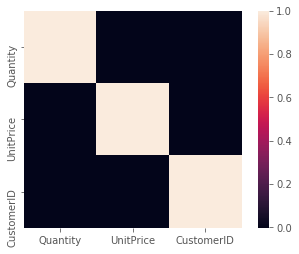

In [8]:
cor = wh.corr()
sns.heatmap(cor, square = True) 

## ICI on procède par un CLustring en K-moyennes : 

In [97]:
wh1 = pd.read_csv("dataUK.csv",encoding = "ISO-8859-1")
wh1 = wh1.dropna()
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
wh1['Country'] = le.fit_transform(wh1['Country'])
wh1['InvoiceDate'] = le.fit_transform(wh1['InvoiceDate'])

wh1['Description'] = le.fit_transform(wh1['Description'].astype(str))
wh1['StockCode'] = le.fit_transform(wh1['StockCode'])
wh1['InvoiceNo'] = le.fit_transform(wh1['InvoiceNo'])


def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(wh1, 2)
kmeans = pd.DataFrame(clust_labels)
wh1.insert((wh1.shape[1]),'kmeans',kmeans)



## Tracer le graphe obtenues à l'aide de k moyennes

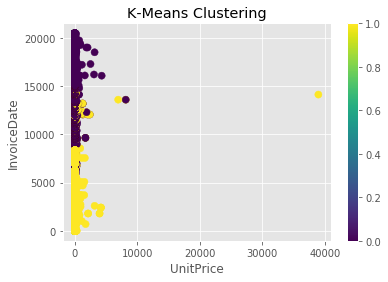

In [110]:

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['UnitPrice'],wh1['InvoiceDate'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('UnitPrice')
ax.set_ylabel('InvoiceDate')
plt.colorbar(scatter)